In [1]:
import numpy as np 
import math
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
iris = datasets.load_iris()
x = iris.data[:100]
y = iris.target[:100]
y = y.reshape(y.shape[0],1)

<h3>The reason for getting only hunder obesrvation from the data set is because we have to perform binomial logistic regression</h3>

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names[:2]

array(['setosa', 'versicolor'],
      dtype='<U10')

<h5>Data Set Characteristics:<br>
    :Number of Instances: 100 (50 in each of two classes)<br>
    :Number of Attributes: 4 numeric, predictive attributes and<br> the class<br>
    :Attribute Information:<br>
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa (0)
                - Iris-Versicolour (1)
                

In [5]:
x0 = np.ones([x.shape[0] , 1])
x =  np.concatenate((x0 , x) , axis = 1)

In [6]:
theta = np.zeros([1 , x.shape[1]])
print(theta)

[[ 0.  0.  0.  0.  0.]]


In [7]:
from sklearn.model_selection import train_test_split as tt
x_train , x_test , y_train , y_test = tt(x , 
                                         y , 
                                         test_size = 0.2 ,
                                         random_state = 30)

<h3>Logistic Regression</h3>

In [8]:
def logistic_regression( x , theta):
	z  = x @ (-theta.T)
	eulers = np.power(math.e , z)
	pred_y = 1 / (1 + eulers)

	classified = []
	for i in pred_y:
		if i >= 0.5:
			classified.append(1)
		else:
			classified.append(0)

	return pred_y , classified

<h2>Cost Function</h2>

In [9]:
def costFunction(x,y,theta):
    z = x @ (-theta.T)
    euler = np.power(math.e , z)
    pred_y = 1/(1 + euler)
    
    costF = ( (-y* (np.log(pred_y)) ) - (1-y)* (np.log(1-pred_y)) )
    
    return sum(costF)/len(x)

<h2>Gradient Descent</h2>

In [10]:
def gradientDescent(x , y , theta , alpha , iterations):
    cost = np.zeros(iterations)
    for i in range(iterations):
        z = x @ (-theta.T)
        eulers = np.power(math.e , z)
        pred_y = 1/(1+eulers)
    
        partialDerivativeoftheta = (1/len(x))* (sum((pred_y - y)*x))
        
        theta = theta - (alpha*partialDerivativeoftheta)
        cost[i] = costFunction(x,y,theta)
        
    return theta , cost

In [11]:
alpha = 0.01
iterations = 10000

In [12]:
coef , new_cost = gradientDescent(x_train , y_train , theta , alpha , iterations)
print(coef)

[[-0.34412577 -0.56096477 -1.99763575  3.07766671  1.36401722]]


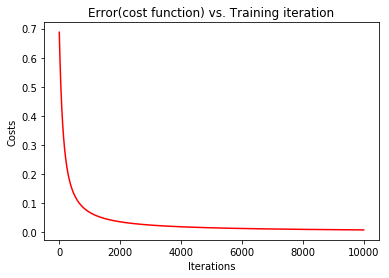

In [13]:
plt.plot(np.arange(iterations), new_cost, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Costs')  
plt.title('Error(cost function) vs. Training iteration')
plt.show()

<h5>From the above plot we can infer that gradient descent is working properly as the cost is decreasing every iteration.</h5>

In [14]:
pred_y , classified = logistic_regression(x_test , coef)

In [15]:
from sklearn.metrics import confusion_matrix , classification_report 
print("confusion matrix")
print(confusion_matrix(y_test , classified))
print("\n \nreport")
print(classification_report(y_test , classified))

confusion matrix
[[ 9  0]
 [ 0 11]]

 
report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        20

